MUHAMMAD JAWAHIRUL FANANI (09020621036)

Student Performance Case

Disini saya melakukan prediksi terhadap performa siswa. Parameter yang saya prediksi adalah nilai matematika. Algoritma yang saya gunakan untuk prediksi adalah ANN (Artificial Neural Network). Disini saya juga melakukan Exploratory Data Analys (EDA) sebelum masuk ke tahap deep learning.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [57]:
df = pd.read_csv('dataset/exams.csv')

Exploratory Data Analys (EDA)

In [58]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [60]:
for col in df.select_dtypes('object').columns:
    print(f'{col}: {df[col].unique()}')

gender: ['female' 'male']
race/ethnicity: ['group D' 'group B' 'group C' 'group E' 'group A']
parental level of education: ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['completed' 'none']


Text(0.5, 1.0, 'Count student by gender')

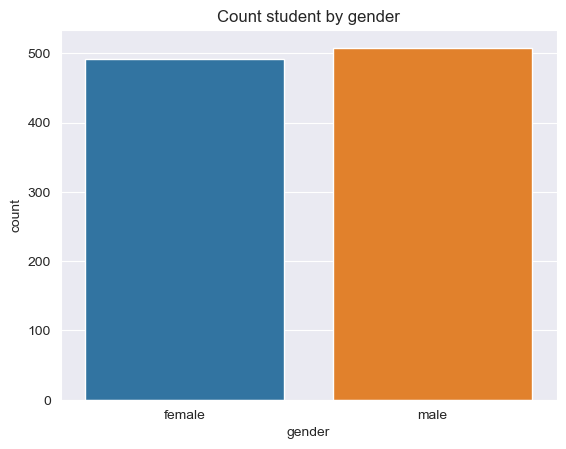

In [61]:
sns.countplot(x=df['gender'])
plt.title('Count student by gender')

Text(0.5, 1.0, 'count race/ethnicity by gender')

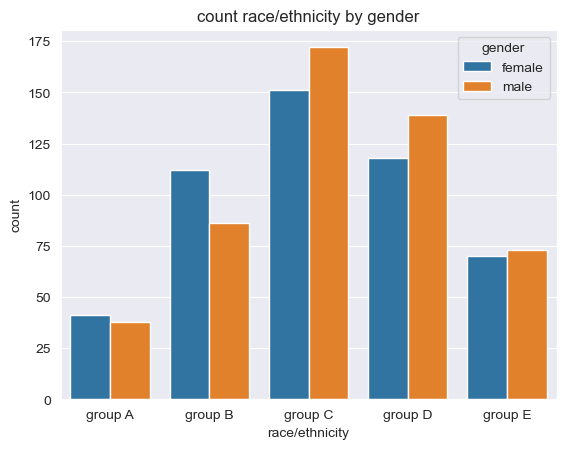

In [62]:
sns.countplot(x=df['race/ethnicity'].sort_values(),hue=df['gender'])

plt.title('count race/ethnicity by gender')

Text(0.5, 1.0, 'Count Parental level education')

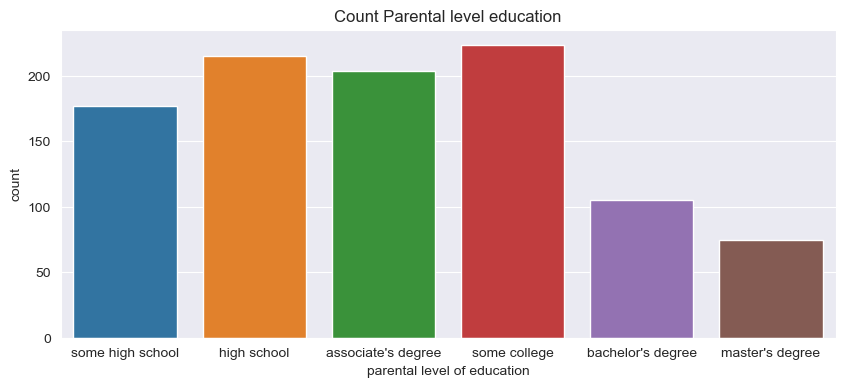

In [63]:


plt.figure(figsize=(10,4))
sns.countplot(x=df['parental level of education'],order=['some high school','high school',"associate's degree",
                                                        'some college',"bachelor's degree","master's degree"])

plt.title('Count Parental level education')



Text(0.5, 1.0, 'Count standard lunch and free lunch')

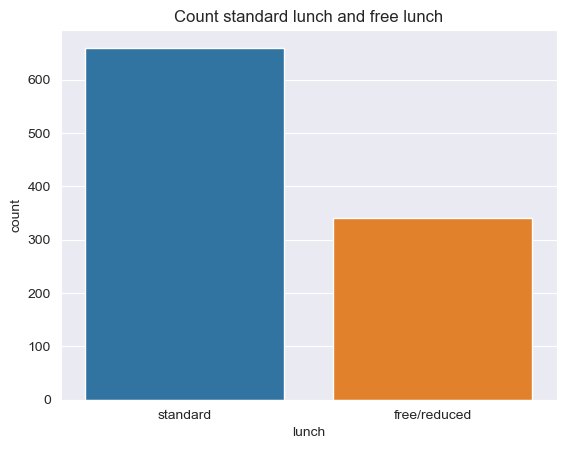

In [64]:
sns.countplot(x=df['lunch'])
plt.title('Count standard lunch and free lunch')

c:\Users\M JAWAHIRUL FANANI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='math score', ylabel='Count'>

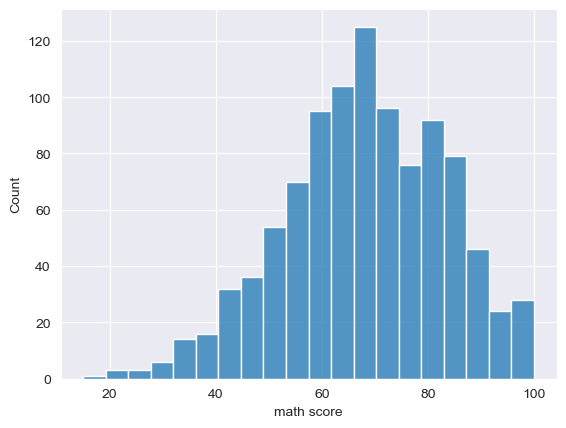

In [65]:
sns.histplot(x=df['math score'])

<Axes: xlabel='gender', ylabel='math score'>

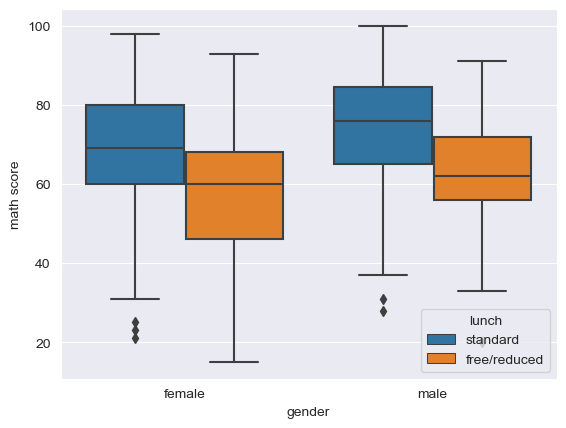

In [66]:
sns.boxplot(x='gender',y='math score',data=df,hue='lunch')

In [67]:
df.groupby('gender').describe()['math score']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,492.0,64.77439,15.079150,15.0,55.0,65.0,75.0,98.0
male,508.0,70.75000,14.847499,20.0,60.0,72.0,82.0,100.0


<Axes: xlabel='parental level of education', ylabel='math score'>

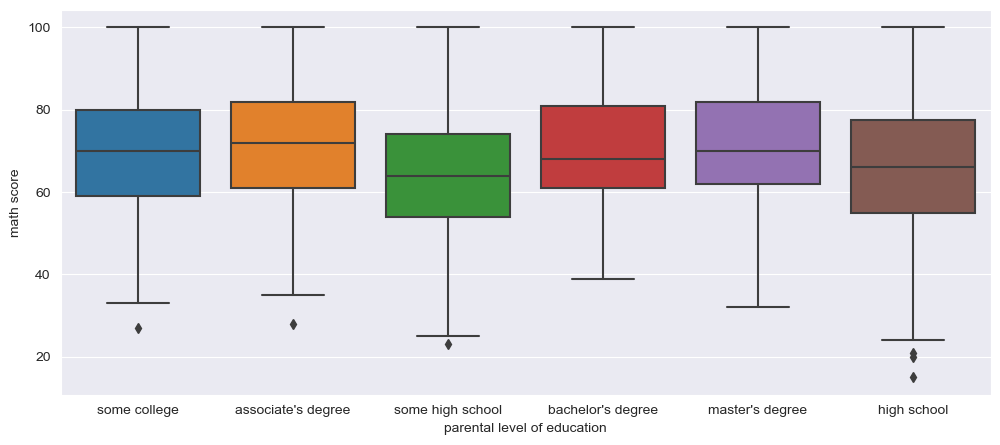

In [68]:
plt.figure(figsize=(12,5))
sns.boxplot(x='parental level of education',y='math score',data=df)

Data Preprocessing

In [69]:


df['test preparation course']= df['test preparation course'].replace(['none','completed'],['No','Yes'])



In [70]:
#converting categorical columns to dummies
dummies= pd.get_dummies(df[['gender','race/ethnicity','parental level of education','lunch',
                           'test preparation course']],drop_first=True)

In [71]:
#final data set with numeric values
df_processed= pd.concat([df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis=1),
          dummies],axis=1)

In [72]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   math score                                     1000 non-null   int64
 1   reading score                                  1000 non-null   int64
 2   writing score                                  1000 non-null   int64
 3   gender_male                                    1000 non-null   bool 
 4   race/ethnicity_group B                         1000 non-null   bool 
 5   race/ethnicity_group C                         1000 non-null   bool 
 6   race/ethnicity_group D                         1000 non-null   bool 
 7   race/ethnicity_group E                         1000 non-null   bool 
 8   parental level of education_bachelor's degree  1000 non-null   bool 
 9   parental level of education_high school        1000 non-null   bool 
 10  p

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X=df_processed.drop('math score',axis=1).values
y=df_processed['math score'].values

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [79]:
X.shape

(1000, 14)

In [80]:
model =Sequential()

model.add(Dense(14,activation='relu'))

model.add(Dense(14,activation='relu'))

model.add(Dense(14,activation='relu'))

model.add(Dense(1,activation='relu'))

model.compile(loss='mse',optimizer='adam')

In [81]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),verbose=1,epochs=800,batch_size=128)

Epoch 1/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 4825.8462 - val_loss: 4773.8354
Epoch 2/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4919.4937 - val_loss: 4767.5269
Epoch 3/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4732.0596 - val_loss: 4758.7212
Epoch 4/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4806.9038 - val_loss: 4746.4961
Epoch 5/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4802.7607 - val_loss: 4729.3188
Epoch 6/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4747.5962 - val_loss: 4707.1343
Epoch 7/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4701.7334 - val_loss: 4679.5962
Epoch 8/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4802.1230 - val_loss: 4645.7036
Epoch 9/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4721.3047 - val_loss: 4604.5259
Epoch 10/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4677.6592 - val_loss: 4555.2441
Epoch 11/800
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4676.0376 - val_loss: 4496.2261
Epoch 12/800
6/6

<Axes: >

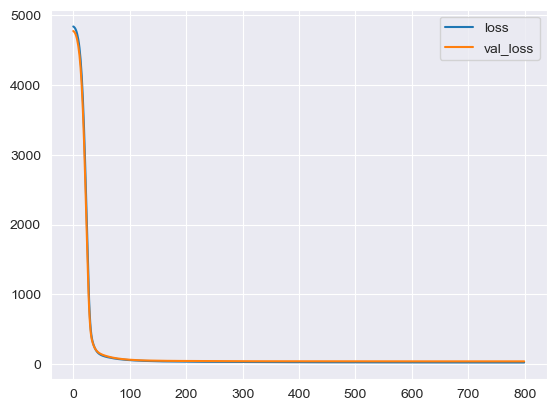

In [82]:
losses= model.history.history
pd.DataFrame(losses).plot()

In [83]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [84]:
predictions=model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [85]:
mae= mean_absolute_error(y_test,predictions)
mse=mean_squared_error(y_test,predictions)
RMSE= mse**0.5
print(f'MAE: {mae}\nMSE: {mse}\nRMSE: {RMSE}')

MAE: 5.088416061401367
MSE: 40.12060482759535
RMSE: 6.334082792922378


In [86]:
math_mean= df['math score'].mean()

In [87]:
model_score= 1-(RMSE/math_mean)
print(f'model score: {model_score*100}')

model score: 90.65907271357855
